In [1]:
%matplotlib inline
from d2l import torch as d2l

In [2]:
from xinet.utils import plt, set_figsize
from xinet import torch as xinet

np = xinet.np

In [3]:
true_w = np.array([2, -3.4])
true_b = 4.2
features, labels = d2l.synthetic_data(true_w, true_b, 1000)

In [4]:
print('features:', features[0], '\nlabel:', labels[0])

features: tensor([-0.0353,  1.8684]) 
label: tensor([-2.2344])


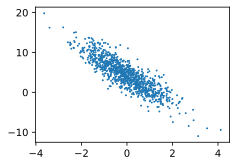

In [5]:
set_figsize()
plt.scatter(features[:, (1)].detach(),
                labels.detach(), 1);

In [6]:
batch_size = 10
data_iter = xinet.load_array((features, labels), batch_size)

In [9]:
w = np.normal(0, 0.01, (2, 1))
b = np.zeros(1)
w.requires_grad_ = True
b.requires_grad_ = True

In [10]:
def linreg(X, w, b):  #@save
    """线性回归模型。"""
    return np.dot(X, w) + b

In [11]:
def squared_loss(y_hat, y):  #@save
    """均方损失。"""
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

In [12]:
def sgd(params, lr, batch_size):  #@save
    """小批量随机梯度下降。"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()